# Advanced Statistical Methods for Data Intensive Science (Lent Term Project)

### Overview

In 1901 Captain Dimitrios Kontos and a crew of sponge divers, retrived numerous large objects from an ancient Roman cargo ship, 45 meters below the sea level, near the island of Antikythera (Greek island located in the Mediterranean Sea). Among the many objects retrived from the wreckage there was a tool, that is now know as the Antikythera mechanism.

The mechanism was designed by ancient Greek astronomers during the second century BC. This was the first known analog computer in human history. This consists of a ca;emdar ring with holes punched at the extrimity of its circumference. Unfortunaly approximatelly $25\%$ of the ring survived. We used to believe that the full ring contained $365$ holes, impling that the mechanism was used as a solar calendar. While, a new theory suggest that there were $354$ holes overall, i.e. the mechanism was a lunar calendar.

### Project Objective

In this project we aim to use an X-ray image of the calendar ring to then infer on the number of holes present in the comple ring, through Bayesian inference with Hamiltonian Monte Carlo. 


In [5]:
# Importing required packages
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

### Visualising Data

In [4]:
# Importing data on Antikythera Mechanism (AM) as data_AM
data_AM = pd.read_csv("data/1-Fragment_C_Hole_Measurements.csv")

# Printing data
data_AM  

,Section ID,Hole,Inter-hole Distance,Mean(X),Mean(Y)
0,0,1,NaN,15.59931,92.59653
1,1,2,NaN,16.44167,91.50069
2,1,3,1.440694,17.30764,90.34931
3,1,4,1.456973,18.15278,89.16250
4,1,5,1.299821,18.96528,88.14792
...,...,...,...,...,...
76,7,77,1.259985,108.69444,63.42778
77,7,78,1.430105,110.05486,63.86875
78,7,79,1.179606,111.14583,64.31736
79,7,80,1.428043,112.48021,64.82604


As part of the first task, we want to make a plot of the measured holes $d_i \in \mathbb{R}^2$ in the $x$-$y$ plane, where $i$ labels the holes, to indicate which holes are in each fractured section of the ring. 

In [ ]:
# Separating each hole based on their IDs

# Checking what is the maximum value of the Section ID 
print('Maximum value in Section ID:',max(data_AM['Section ID']))

# Max = 7, i.e. 8 sections


Maximum value in Section ID: 7


As we can see the are eight different sections of the Antikythera, let us separate each hole based on each respective section.

/tmp/ipykernel_164464/1703438837.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap("tab10", len(data_AM["Section ID"].unique()))


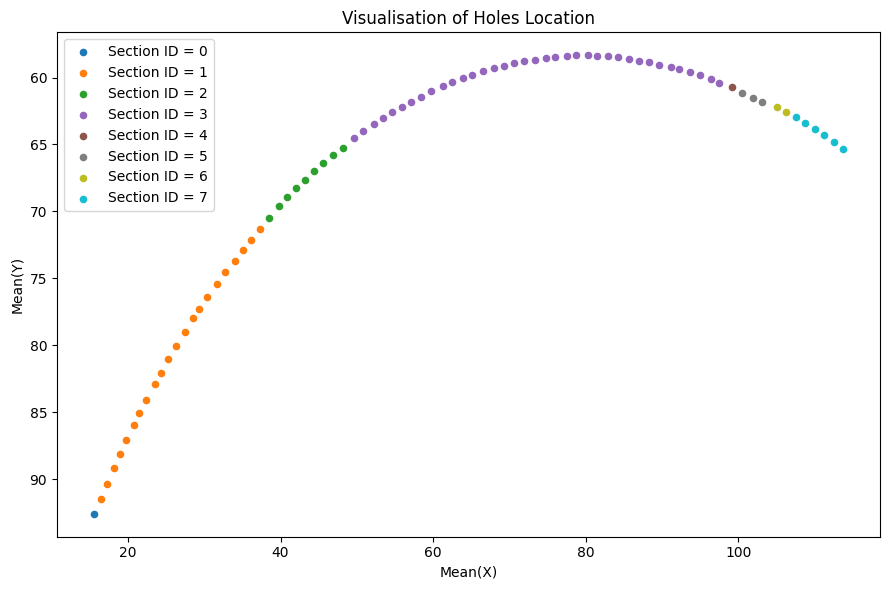

In [ ]:
# Define colors using a colormap
colors = plt.cm.get_cmap("tab10", len(data_AM["Section ID"].unique()))

# Plot
plt.figure(figsize=(9, 6))

# Loop through each section and plot automatically
# Selecting different region based on Section ID
for i, (section, data) in enumerate(data_AM.groupby("Section ID")):
    plt.scatter(data["Mean(X)"], data["Mean(Y)"], s=20, color=colors(i), label=f"Section ID = {section}")

# Add labels and title
plt.xlabel('Mean(X)')
plt.ylabel('Mean(Y)')
plt.title('Visualisation of Holes Location')

# Invert y-axis for better visualization (resemble ring shape)
plt.gca().invert_yaxis()

# Add legend and adjust layout
plt.legend()
plt.tight_layout()

# Show plot
plt.show()